<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/structured_noise_injection.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/structured_noise_injection.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/structured_noise_injection.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/structured_noise_injection.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# Structured Noise Injection

This example follows along with [this blog post](https://medium.com/voxel51/fifteen-minutes-with-fiftyone-structured-noise-injection-43c7d16f818d) which looks at a CVPR 2020 paper titled [Disentangled Image Generation Through Structured Noise Injection](https://arxiv.org/pdf/2004.12411.pdf).

The paper presents a new way to control images generated by [GANs](https://en.wikipedia.org/wiki/Generative_adversarial_network).

## Download the data

Download the dataset used in the blog post from [this Google Drive link (477MB)](https://drive.google.com/file/d/1hDKJGGdLnf5mZgt-_ND8l2F7_2uq8Ar7/view?usp=sharing).

The data was generated via the [structured noise injection codebase](https://github.com/yalharbi/StructuredNoiseInjection).

## Setup

If you haven't already, install FiftyOne:

In [ ]:
!pip install fiftyone

In [ ]:
import fiftyone as fo

If the above import fails due to a `cv2` error, it is an issue with OpenCV in Colab environments. [Follow these instructions to resolve it.](https://github.com/voxel51/fiftyone/issues/1494#issuecomment-1003148448)

## Load into FiftyOne

Let's load the dataset into FiftyOne:

In [1]:
import fiftyone as fo
from fiftyone import ViewField as F

In [ ]:
# The path to the unzipped dataset on disk
DATASET_PATH = "/path/to/structured_noise_injection_dataset"

In [3]:
# Load the data into FiftyOne
dataset = fo.Dataset.from_dir(DATASET_PATH, dataset_type=fo.types.FiftyOneDataset)

 100% |████████████████████████████| 300/300 [1.9s elapsed, 0s remaining, 181.7 samples/s]      


In [4]:
# View some information about the dataset
print(dataset)

Name:           2020.10.23.11.14.48
Media type:     None
Num samples:    300
Persistent:     False
Info:           {}
Tags:           []
Sample fields:
    media_type: fiftyone.core.fields.StringField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    face_id:    fiftyone.core.fields.IntField
    mask_id:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    mask:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [5]:
# Launch app and explore the dataset
session = fo.launch_app(dataset)

App launched


## Explore the dataset

With the data loaded into FiftyOne, you can [use the App's features](https://voxel51.com/docs/fiftyone/user_guide/app.html) to visually explore the dataset. You can also [construct views into the dataset](https://voxel51.com/docs/fiftyone/user_guide/using_views.html) programmatically to identify particular samples of interest.

For example, let's compare the images in the dataset that were generated with different noise initializations for the `mouth` region:

In [8]:
# Only include samples whose `mask_id` field has label `mouth`
view = dataset.match(F("mask_id.label") == "mouth")

# Open the view in the App
session.view = view

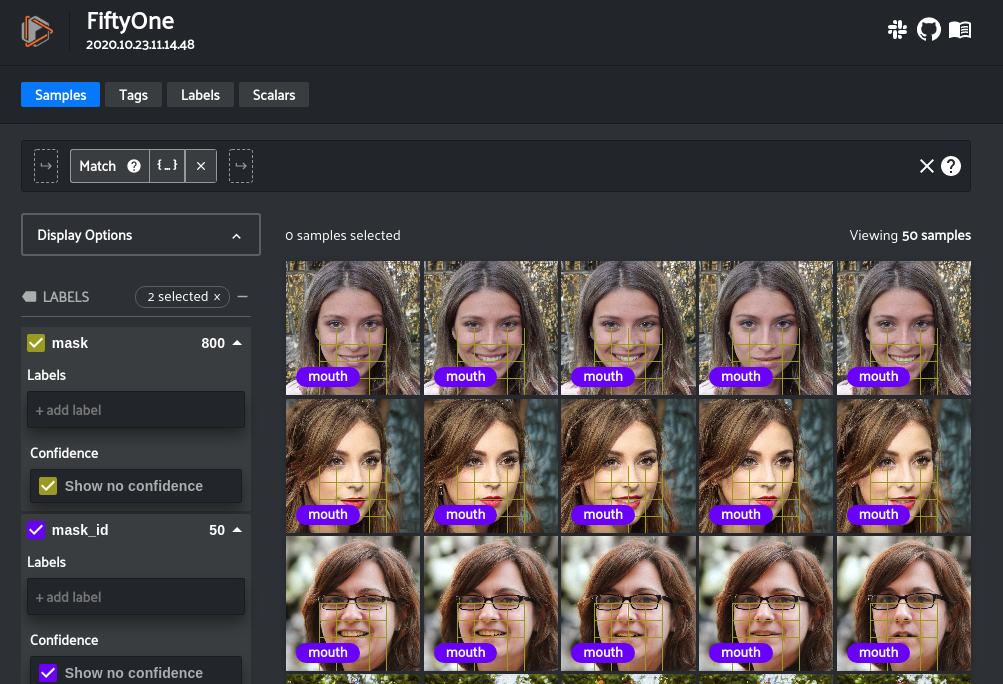